<h1>This is major project on wine quality analysis</h1>
<h2>First we will import all the necessary packages</h2>

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

Now we will read our given data

In [108]:
data= pd.read_csv("redwine.csv")

Lets see some rows of our data

In [109]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


Let's check info of our data

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


Let's see some detail of each coulumn

In [111]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


Now we will clean our data and check the null values present in it.

In [112]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

As very few values are null, we will just insert in them the mean value of that column.

In [113]:
data.update(data.fillna(data.mean()))


<h1>First lets see the correlation between all the elements.<h1>

<AxesSubplot:>

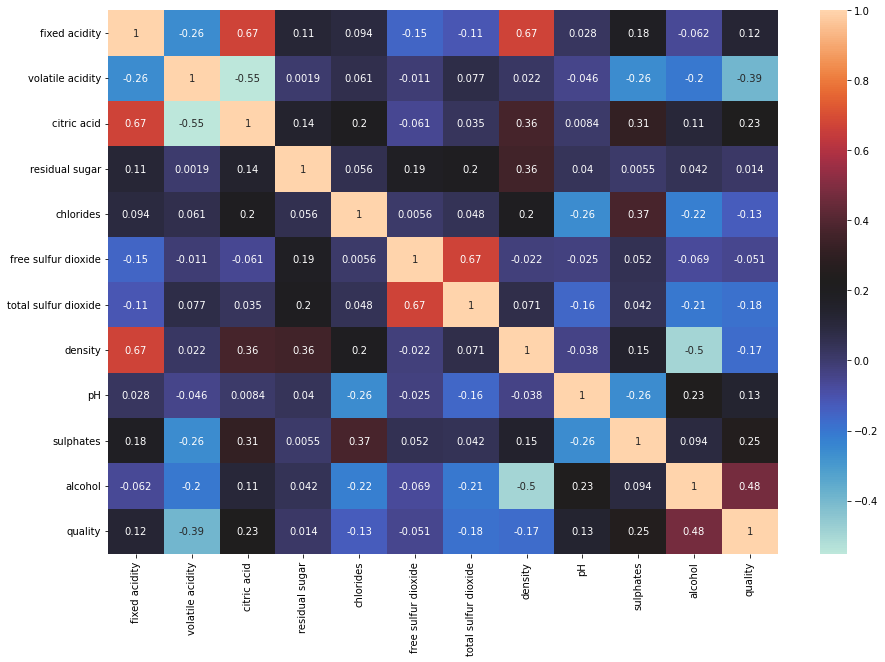

In [114]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot= True, cmap='icefire')

In [115]:
data.corr()['quality']

fixed acidity           0.123985
volatile acidity       -0.390132
citric acid             0.225730
residual sugar          0.013756
chlorides              -0.129010
free sulfur dioxide    -0.050896
total sulfur dioxide   -0.184655
density                -0.174730
pH                      0.133930
sulphates               0.251073
alcohol                 0.475832
quality                 1.000000
Name: quality, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

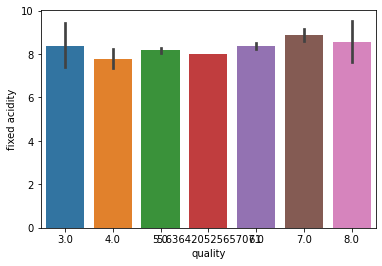

In [116]:
plt.figure()
plt.ylabel('fixed acidity')
plt.xlabel('quality')
sns.barplot(data['quality'],data['fixed acidity'])

## There is no effect of fixed acidity on quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

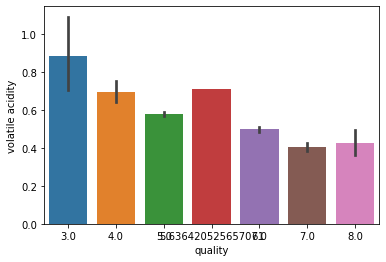

In [117]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

## As we can see quality increases, the volatile acidity decreases.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

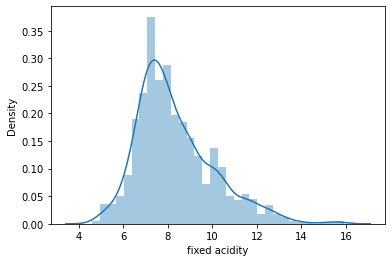

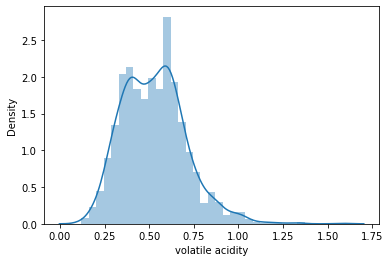

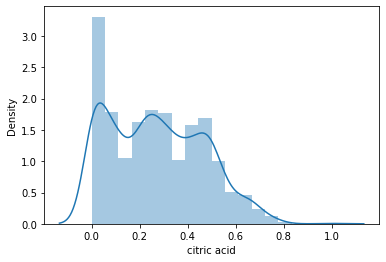

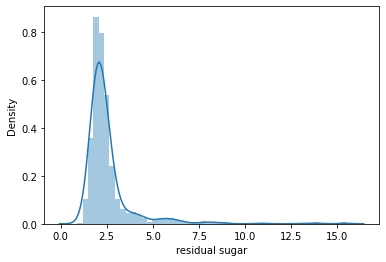

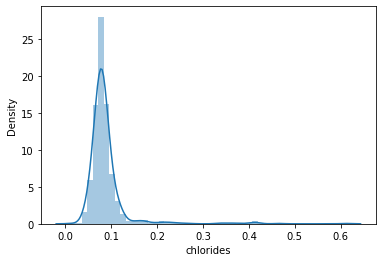

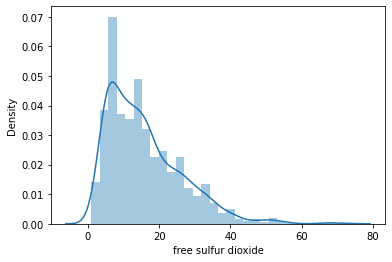

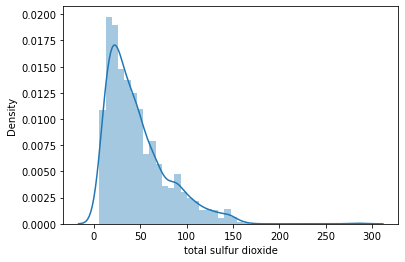

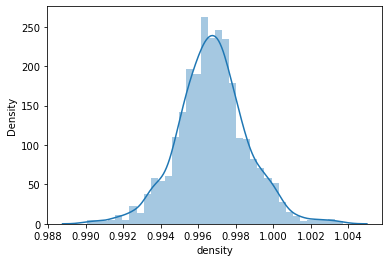

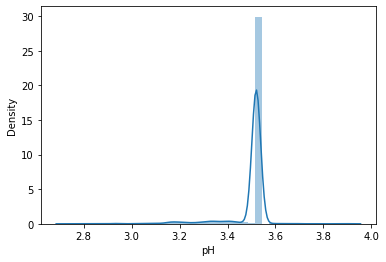

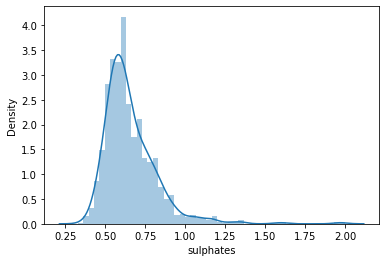

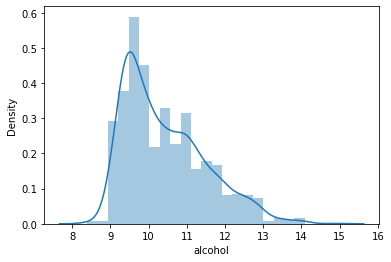

In [118]:
for i in data.columns[:-1]:
    plt.figure()
    sns.distplot(data[i])

In [119]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<h2>Now we will apply log tranformations to skewed curves</h2>

In [120]:
lognorm= ['free sulfur dioxide', 'total sulfur dioxide','alcohol','citric acid']

In [121]:
for i in lognorm:
    data[i]= np.log(1+data[i])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

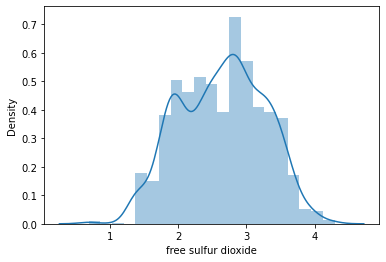

In [122]:
sns.distplot(data['free sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

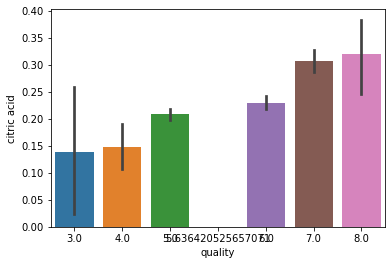

In [123]:
sns.barplot(x = 'quality', y = 'citric acid', data = data)

## As we can see citric acid increases, the quality increases 


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

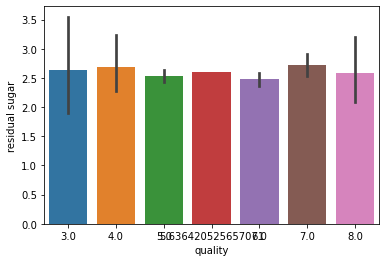

In [124]:
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

## Here residual sugar doesn't have much affect on the quality of wine 

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

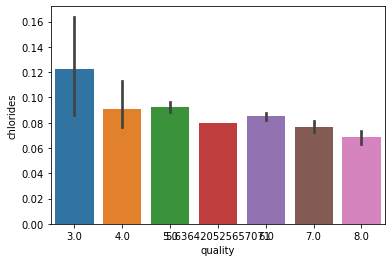

In [125]:
sns.barplot(x = 'quality', y = 'chlorides', data = data)

## Here, chloride goes down as we go up in wine quality

In [126]:
plots= ['free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol' ]

## It can be observed from plots below that-
### - As quality increases, quantity of sulphates also increases
### - As quality goes up, alcohol content also goes up


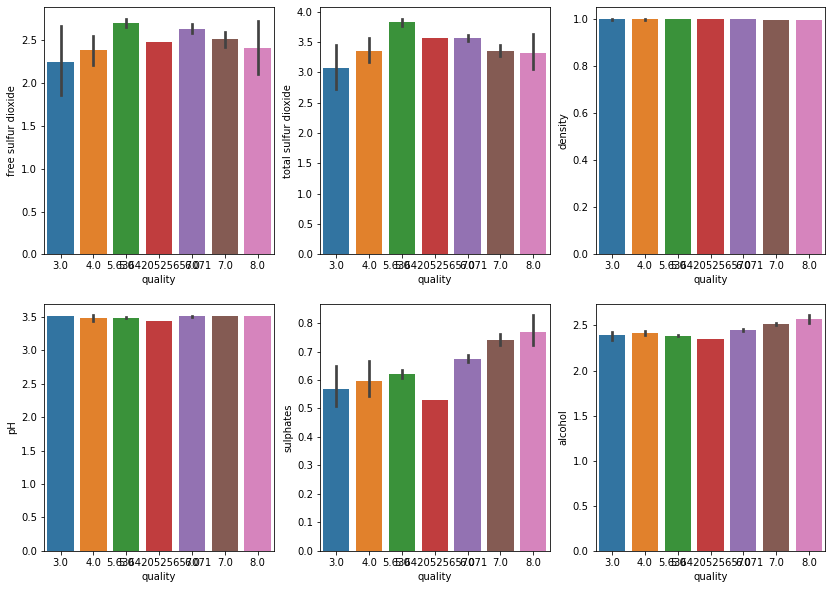

In [127]:
index=1
plt.figure(figsize=(14,10))
for i in plots:
    plt.subplot(2,3,index)
    sns.barplot(x = 'quality', y = i, data = data)
    print()
    index+=1

## Now we will do Feature Engineering

In [128]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8.5)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [129]:
le= LabelEncoder()

In [130]:
data['quality']=le.fit_transform(data['quality'])

In [131]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<h1>Here we notice a class imbalance</h1>
<h2>So we will use upsampling</h2> 

In [132]:
df_minority= data[data['quality']==1]
df_majority= data[data['quality']==0]

In [133]:
df_majority.shape

(1382, 12)

In [134]:
df_minority.shape

(217, 12)

In [135]:
from sklearn.utils import resample

In [136]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1379,    # to match majority class
                                 random_state=120) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.quality.value_counts()

0    1382
1    1379
Name: quality, dtype: int64

In [137]:
X= df_upsampled.drop('quality',axis=1)

In [138]:
y=df_upsampled['quality']

### Let's split our data now

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [140]:
scaler= StandardScaler()

In [141]:
X_test= scaler.fit_transform(X_test)
X_train= scaler.fit_transform(X_train)

## lets see our models now
### first we will use support vector classifier

In [142]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [143]:
print(classification_report(y_test, pred_svc))


              precision    recall  f1-score   support

           0       0.89      0.83      0.86       414
           1       0.84      0.90      0.87       415

    accuracy                           0.86       829
   macro avg       0.87      0.86      0.86       829
weighted avg       0.87      0.86      0.86       829



## As we are getting 86% accuracy using svc but we should increase our accuracy
### Now lets see random forest classifier model

In [144]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [145]:
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       414
           1       0.94      0.97      0.95       415

    accuracy                           0.95       829
   macro avg       0.95      0.95      0.95       829
weighted avg       0.95      0.95      0.95       829



## Here rfc is giving very good accuracy of 95% and can be used